# 데이터의 특성

- 모든 연속형 변수를 두 번 이상 측정하면 다른 값이 나온다. 이 때 변수의 측정값이 변하는 경향을 `변동(variation)`이라고 말한다.<br>
범주형 변수 역시 서로 다른 피실험자 또는 다른 시간을 측정하는 경우 다를 수 있다.<br>
결국 각각의 측정값은 서로 다른 약간의 오차를 포함하는데<br> 
이 때 모든 변수들은 **고유한 변동 패턴**을 가지고 있고 이러한 패턴을 이해하는 가장 좋은 방법은 변수들 값의 분포를 시각화 하는 것이다. 

## 시각화

In [10]:
library('tidyverse')

`-` 범주형 변수

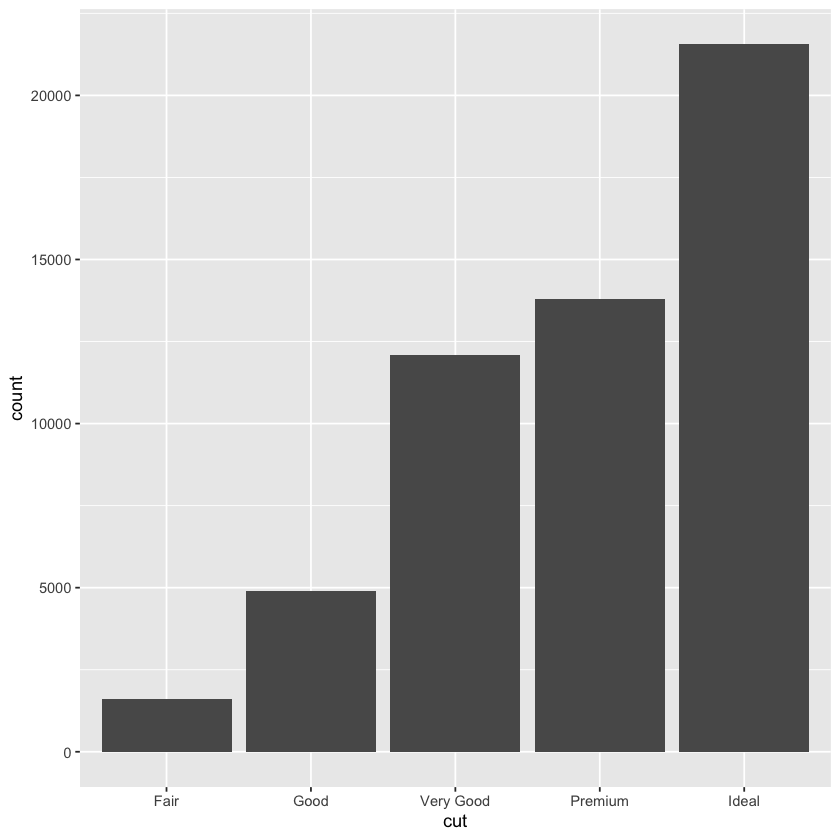

In [11]:
ggplot(data = diamonds) + 
geom_bar(mapping = aes(x = cut))

In [12]:
diamonds %>% count(cut)

cut,n
<ord>,<int>
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


`-` 연속형 변수

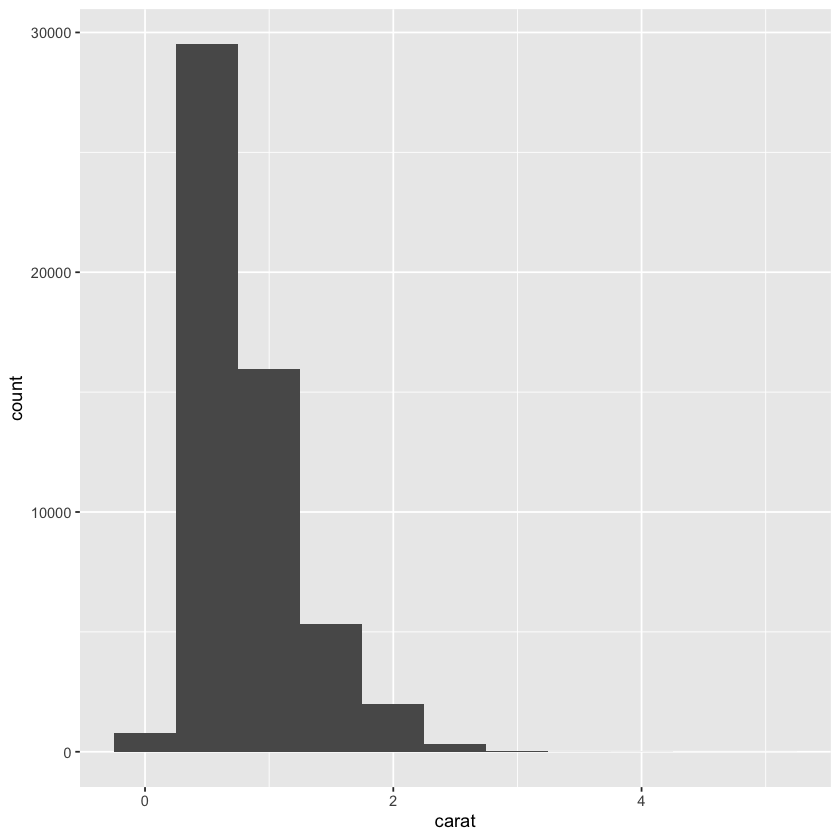

In [13]:
ggplot(data = diamonds) +
geom_histogram(mapping = aes(x= carat), binwidth = 0.5)

In [14]:
diamonds %>%
count(cut_width(carat, 0.5))

"cut_width(carat, 0.5)",n
<fct>,<int>
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4


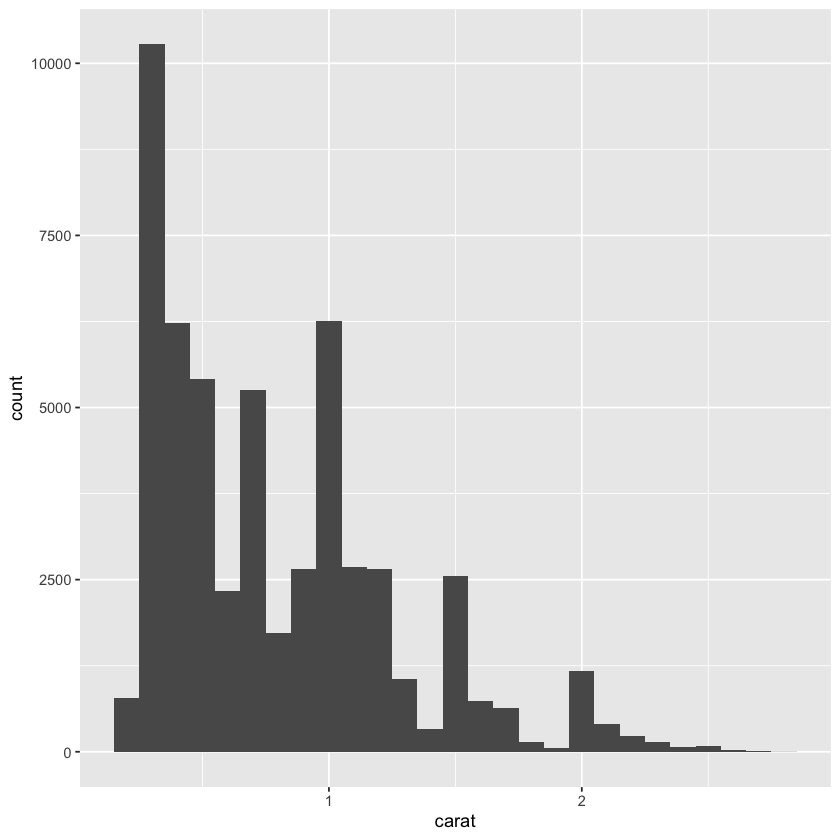

In [15]:
smaller <- diamonds %>%
filter(carat < 3)

ggplot(data = smaller, mapping = aes(x = carat)) +
geom_histogram(binwidth = 0.1)

`geom_freqpoly` : 같은 플롯에서 여러개의 히스토그램을 겹처서 그리기

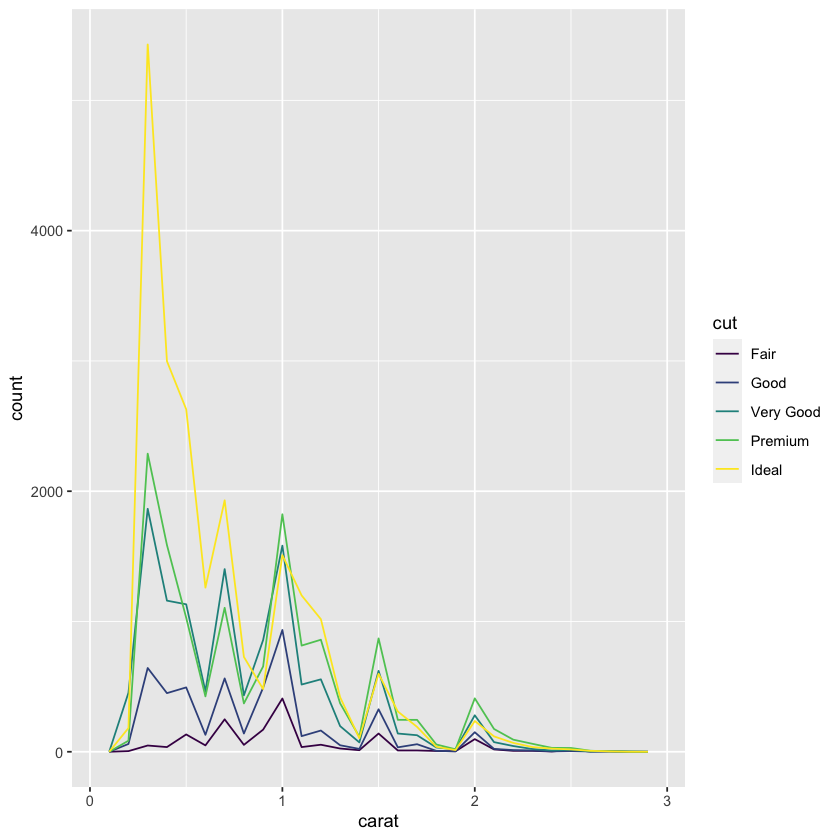

In [16]:
ggplot(data = smaller, mapping = aes(x = carat, color = cut)) +
geom_freqpoly(binwidth = 0.1)

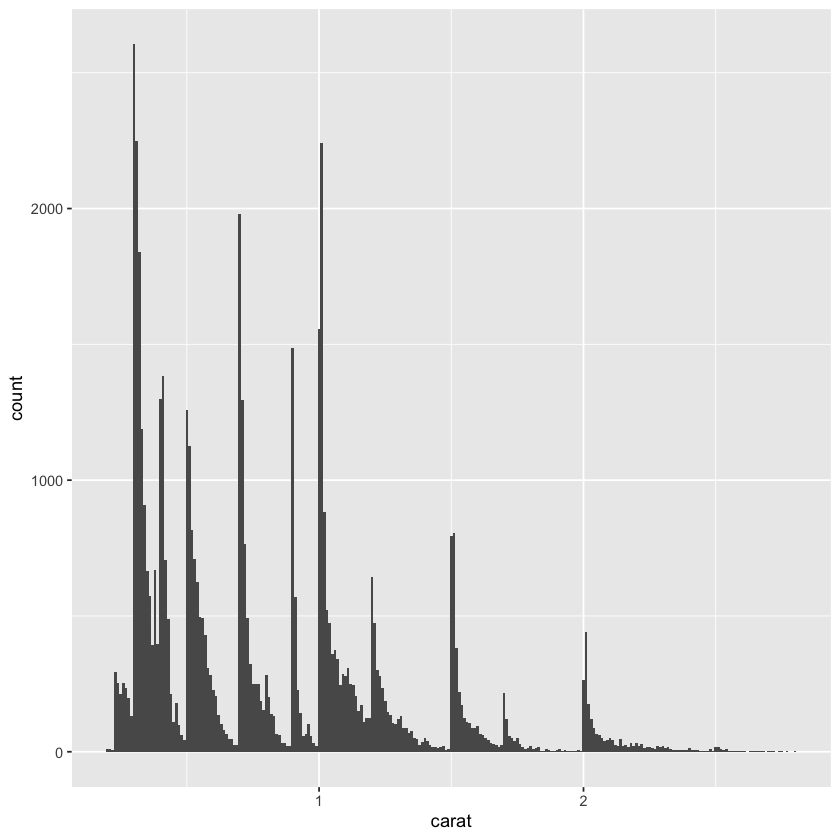

In [17]:
ggplot(data = smaller, mapping = aes(x = carat)) +
geom_histogram(binwidth = 0.01)

- 위의 그래프는 일부 캐럿의 다이아몬드가 많은 의문을 자아낸다.<br>일반적이라면 정규분포 혹은 고르게 분포할 것으로 예상해 볼 수 있겠다.

In [25]:
faithful %>% head #Yellowstone 분출간격 자료

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55


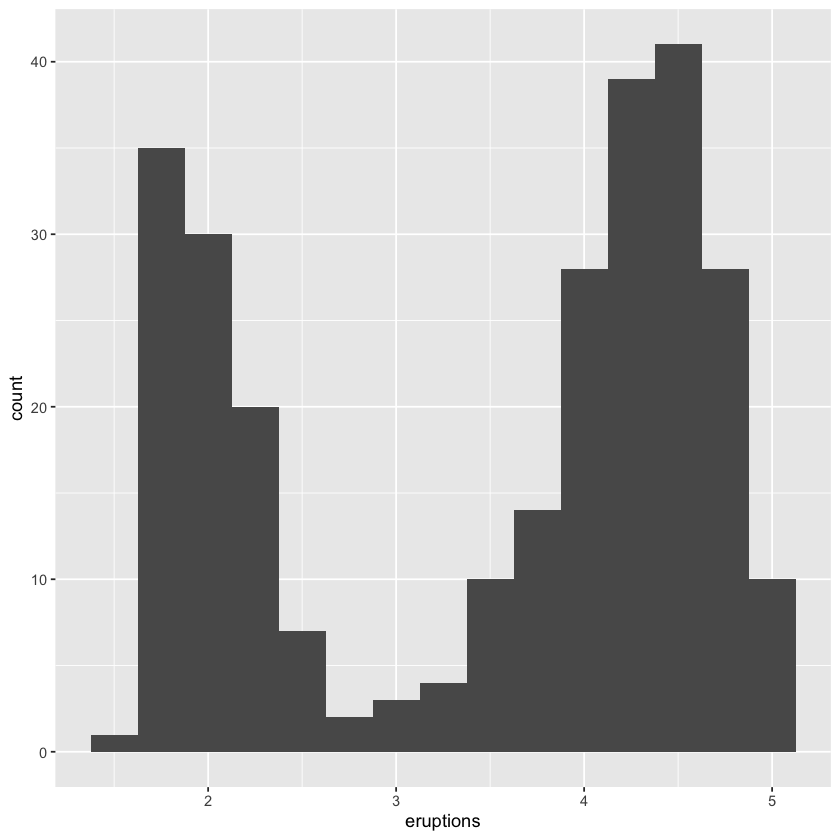

In [21]:
ggplot(data = faithful, mapping = aes(x = eruptions)) + 
geom_histogram(binwidth = 0.25)

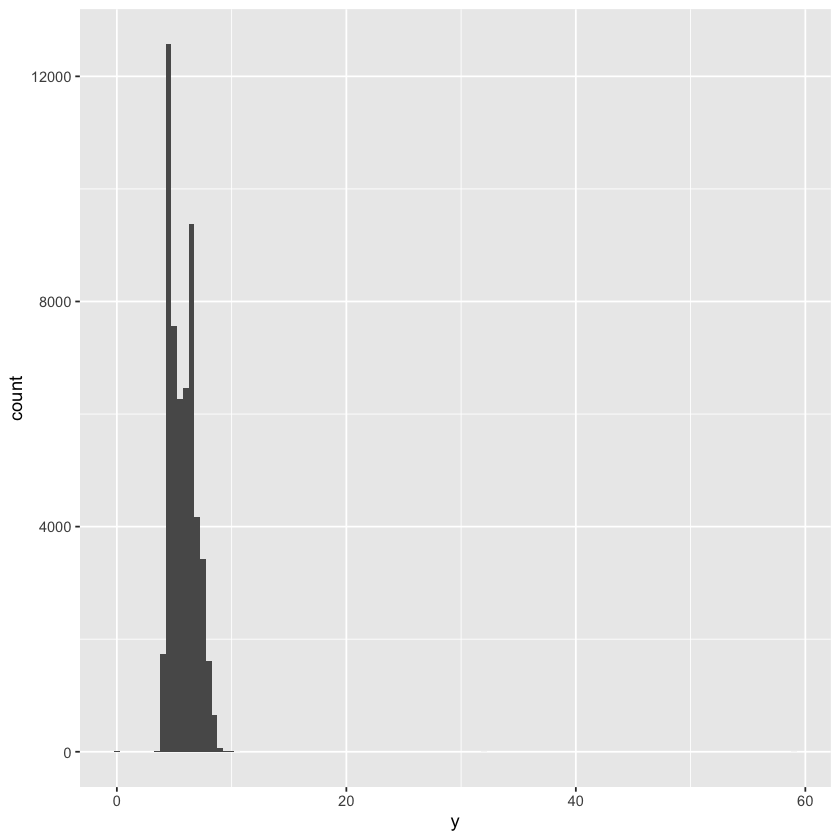

In [27]:
ggplot(diamonds) +
geom_histogram(mapping = aes(x = y), binwidth = 0.5)

- 이런 특정한 구간에 관측값이 쏠려 있는 경우 이상값을 알아내기 어려움.<br>그래서 보고 싶은 구간을 확대해서 본다.

`coord_cartesian` : x축 or y축의 지정한 특정 범위를 확대해서 보여줌.

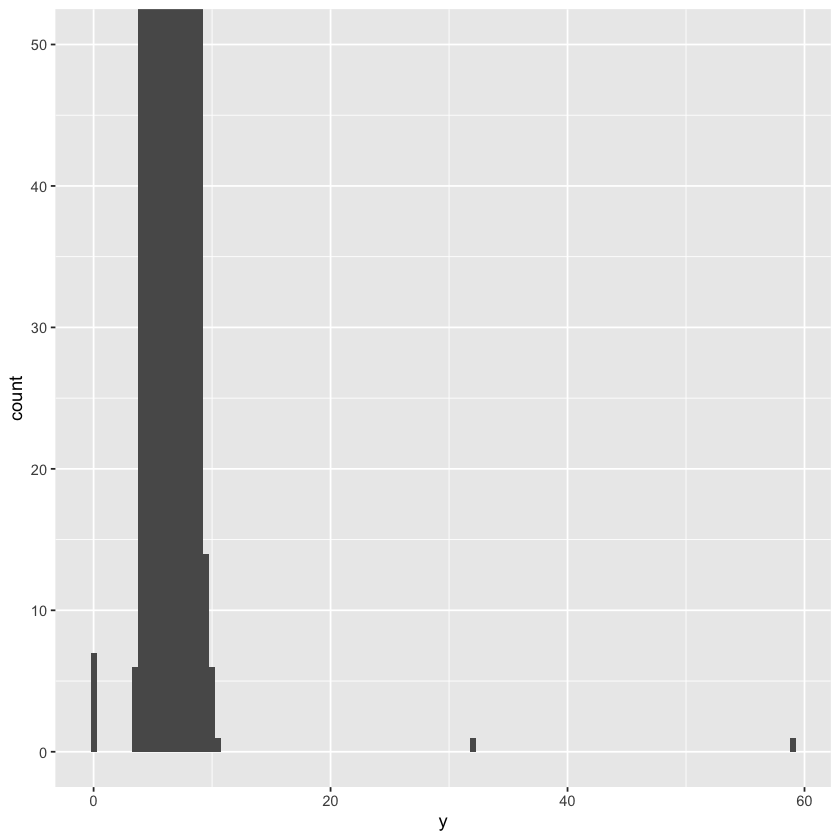

In [31]:
ggplot(diamonds) +
geom_histogram(mapping = aes(x = y), binwidth = 0.5) +
coord_cartesian(ylim = c(0, 50))

- 원본 y축이 0~ 12,000 범위였는데 0 ~ 50 구간으로 확대해서 본 모습<br> 보이지 않던 이상치들이 보이기 시작함.

`-` 위의 그래프에서 보인 두개의 이상값 추출하기 위해 범위를 특정해서 필터링해보기

In [32]:
unusual <- diamonds %>%
filter(y < 3 | y > 20) %>%
select(price, x, y, z) %>%
arrange(y)

In [33]:
unusual

price,x,y,z
<int>,<dbl>,<dbl>,<dbl>
5139,0.00,0.0,0.00
6381,0.00,0.0,0.00
12800,0.00,0.0,0.00
15686,0.00,0.0,0.00
18034,0.00,0.0,0.00
2130,0.00,0.0,0.00
2130,0.00,0.0,0.00
2075,5.15,31.8,5.12
12210,8.09,58.9,8.06


#### 결측값

 - 이상값 처리법 두가지<br> 1) 이상값이 포함된 행 전체를 지운다.<br> 2) 이상값을 결측값으로 변경한다.

1) 지우기(다른 측정값은 유용할 수도 있으므로 권장되지 않음)

In [34]:
diamonds2 <- diamonds %>%
filter(between(y, 3, 20))

In [36]:
diamonds2 %>% head

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


2) 이상값 -> 결측값

In [43]:
diamonds2 <- diamonds %>%
mutate(y = ifelse(y < 3 | y > 20, NA, y))
diamonds2 %>% head

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


Warning message:
“Removed 9 rows containing missing values (geom_point).”


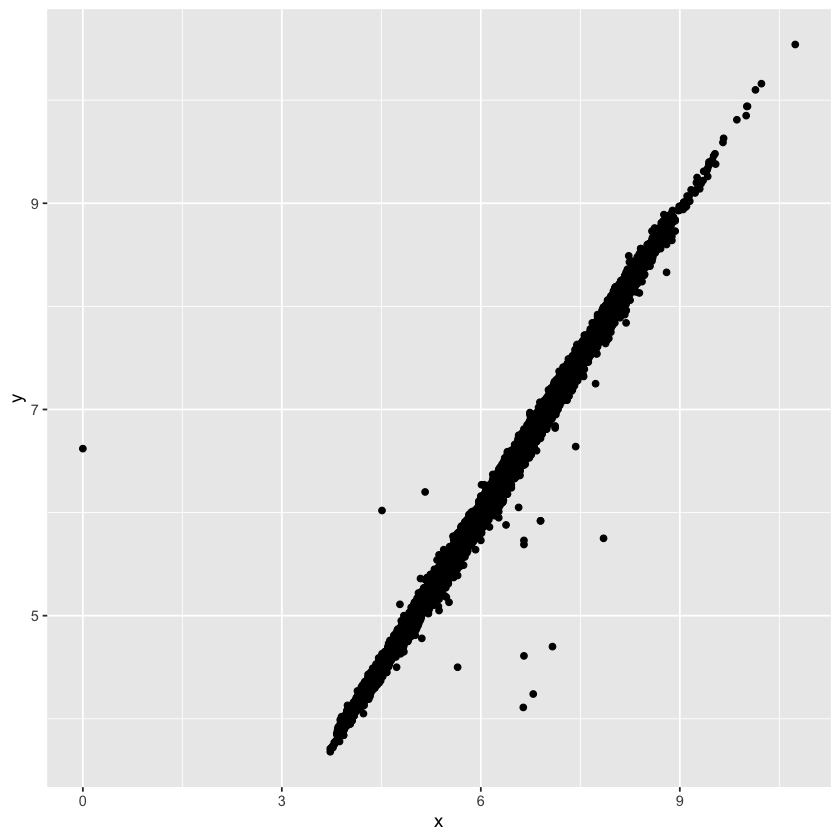

In [44]:
ggplot(data = diamonds2, mapping = aes(x = x, y = y)) +
geom_point()

In [50]:
library('nycflights13') #13년도 뉴욕항공편 데이터

여기서<br>
```R
nycflights13::flights$dep_time
```
값이 NA인 값은 해당 항공편 운항이 취소된 것을 의미 

`-` 취소된 비행기의 예정 출발 시각과 취소되지 않은 비행기의 출발 시각 비교해보기

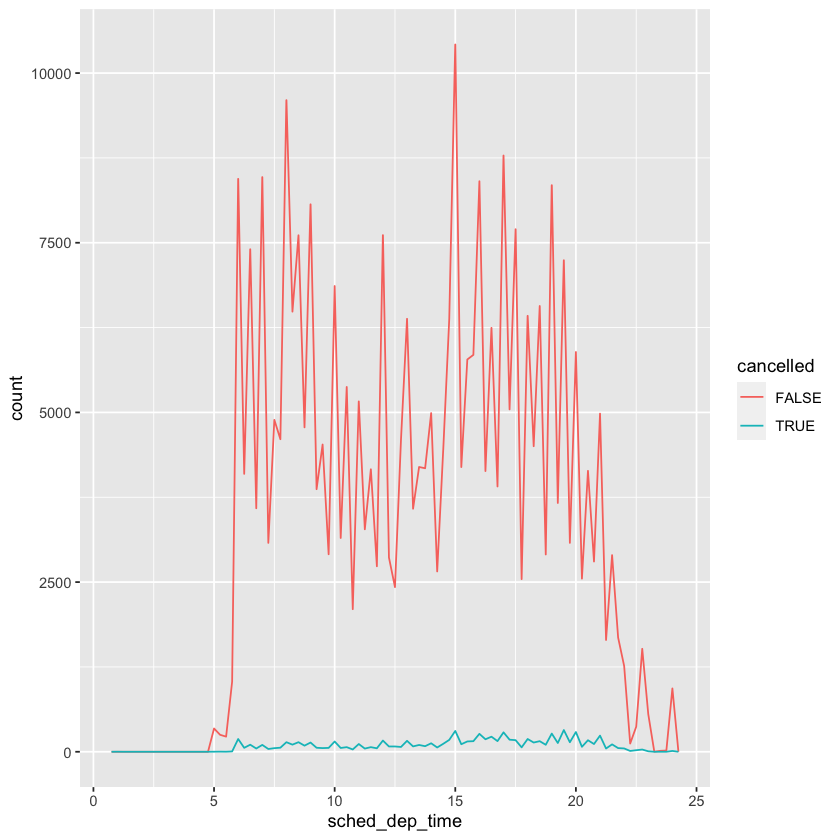

In [59]:
nycflights13::flights %>%
mutate(
    cancelled = is.na(dep_time),
    sched_hour = sched_dep_time %/% 100,
    sched_min = sched_dep_time %% 100,
    sched_dep_time = sched_hour + sched_min / 60
    ) %>%
ggplot(mapping = aes(sched_dep_time)) +
geom_freqpoly(
    mapping = aes(color = cancelled),
    binwidth = 1/4
    )

- 그래프는 제대로 그려졌으나 취소된 항공편이 취소되지 않은 항공편에 비해 현저히 적기 때문에 이 플랏은 유용하지 않음.<br>
TRUE가 FALSE와 비슷한 수준(count)이라면 유의미한 비교가 가능할듯.(시계열 자료 느낌)